# Wave Equation

## Name Sukyoung Kwak

## Class VOL 4 class

## Date Week 11

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from scipy.linalg import toeplitz
import scipy.optimize
from scipy.sparse import diags
from scipy.optimize import fsolve

# Problem 1
Numerically approximate the solution to the following BVP

$$
u_{tt} = u_{xx} \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = \sin(2\pi x), \\
u_t(x,0) = 0. 
$$

Numerically approximate the solution $u(x,t)$ for $t\in[0,5]$. Use $J=50$ subintervals in the $x$ dimension and $M=50$ subintervals in the $t$ dimension. Animate the results. Compare you results with the analytic solution $u(x,t) = \sin(2\pi x)\cos(2\pi t).$ This function is know as a standing wave.

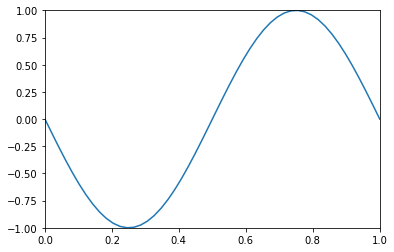

In [23]:
#Setting 
M = 50
J = 50
t, _t= np.linspace(0,.5,M, retstep = True)
x, _x = np.linspace(0,1,J, retstep = True)
s = 1
lamb = s*_t/_x
F = lambda x: np.sin(2*np.pi*x)
G = lambda x: 0*x

#making the W function
def W(t, x, _t, _x, J, M, lamb, F, G):
    #setting A
    A = diags([lamb**2, 2*(1-lamb**2), lamb**2], 
              [-1, 0, 1], shape=(M-2, J-2)).toarray()
    #setting U matrix
    U = np.zeros((M,J))
    #modifyihng the matrix
    U[0][1:-1] = F(x[1:-1])
    U[1][1:-1] = (U[0][1:-1] + 
                  _t*G(x[1:-1]) + 
                  (lamb**2)/2*(U[0][:-2]- 2*U[0][1:-1]+U[0][2:]))
    
    for i in range(2,M):
        U[i][1:-1] = A@U[i-1][1:-1]-U[i-2][1:-1]
        
    return U

U = W(t, x, _t, _x, J, M, lamb, F, G)

#Animation plotting
def update(i):
    graph.set_data(x,U[i][:])
    return graph,
fig = plt.figure()
ax = fig.add_subplot(111)
graph, = plt.plot([],[])
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ani = animation.FuncAnimation(fig, update, frames = range(M), interval = 25)

ani.save('Wave_problem_1.mp4')

<video src="Wave_problem_1.mp4" controls>

# Problem 2

Consider the boundary value problem 

$$
u_{tt} = u_{xx}, \\
u(0,t) = u(1,t) = 0, \\
u(x,0) = 0.2e^{-,^2(x-1/2)^2} \\
y_t(x,0) = 0.4m^2(x-\frac{1}{2})e^{-m^2(x-1/2)^2}.
$$

The solution of this problem is ta Gaussian pulse. It travels to the right at a constant speed. This solution models, for example, a wave pulse in a stretched string. Note that the fixed boundart conditions reflect the pulse back when it meets the boundary.

Numerically approximate the solution $u(x,t)$ for $t\in[0,1]$. Set $m=20$. Use 200 subintervals in space and 220 in time, and animate your results. Then use 200 subintervals in space and 180 in time, and animate your results. Note that the stability condition is not satisfied for the second mesh.

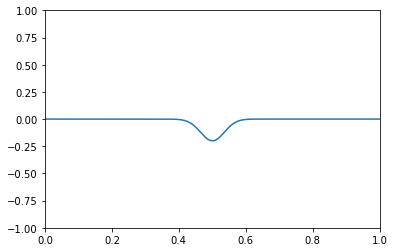

In [24]:
#Setting 
m = 20
M = 220
J = 200
t, _t= np.linspace(0,1,M, retstep = True)
x, _x = np.linspace(0,1,J, retstep = True)
s = 1
lamb = s*_t/_x
F = lambda x: .2*np.exp((-m**2)*(x-1/2)**2)
G = lambda x: .4*(m**2)*(x-1/2)*np.exp((-m**2)*(x-1/2)**2)

#making the W function
def W(t, x, _t, _x, J, M, lamb, F, G):
    #setting A
    A = diags([lamb**2, 2*(1-lamb**2), lamb**2], 
              [-1, 0, 1], shape=(J-2, J-2)).toarray()
    #setting U matrix
    U = np.zeros((M,J))
    #modifyihng the matrix
    U[0][1:-1] = F(x[1:-1])
    U[1][1:-1] = (U[0][1:-1] + 
                  _t*G(x[1:-1]) + 
                  (lamb**2)/2*(U[0][:-2]- 2*U[0][1:-1]+U[0][2:]))
    
    for i in range(2,M):
        U[i][1:-1] = A@U[i-1][1:-1]-U[i-2][1:-1]
        
    return U

U = W(t, x, _t, _x, J, M, lamb, F, G)

#Animation plotting
def update(i):
    graph.set_data(x,U[i][:])
    return graph,
fig = plt.figure()
ax = fig.add_subplot(111)
graph, = plt.plot([],[])
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ani = animation.FuncAnimation(fig, update, frames = range(M), interval = 25)

ani.save('Wave_2_1.mp4')

<video src="Wave_2.mp4" controls>

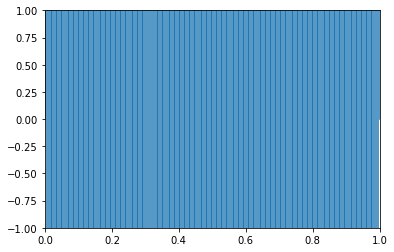

In [25]:
#Setting 
m = 20
M = 180
J = 200
t, _t= np.linspace(0,1,M, retstep = True)
x, _x = np.linspace(0,1,J, retstep = True)
s = 1
lamb = s*_t/_x
F = lambda x: .2*np.exp((-m**2)*(x-1/2)**2)
G = lambda x: .4*(m**2)*(x-1/2)*np.exp((-m**2)*(x-1/2)**2)

#making the W function
def W(t, x, _t, _x, J, M, lamb, F, G):
    #setting A
    A = diags([lamb**2, 2*(1-lamb**2), lamb**2], 
              [-1, 0, 1], shape=(J-2, J-2)).toarray()
    #setting U matrix
    U = np.zeros((M,J))
    #modifyihng the matrix
    U[0][1:-1] = F(x[1:-1])
    U[1][1:-1] = (U[0][1:-1] + 
                  _t*G(x[1:-1]) + 
                  (lamb**2)/2*(U[0][:-2]- 2*U[0][1:-1]+U[0][2:]))
    
    for i in range(2,M):
        U[i][1:-1] = A@U[i-1][1:-1]-U[i-2][1:-1]
        
    return U

U = W(t, x, _t, _x, J, M, lamb, F, G)

#Animation plotting
def update(i):
    graph.set_data(x,U[i][:])
    return graph,
fig = plt.figure()
ax = fig.add_subplot(111)
graph, = plt.plot([],[])
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ani = animation.FuncAnimation(fig, update, frames = range(M), interval = 25)

ani.save('Wave_2_2.mp4')

<video src="Wave_2_2.mp4" controls>

# Problem 3

Consider the initial boundary value problem
$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = 0.2e^{-m^2(x-1/2)^2}\\
	u_t(x,0) = 0.
$$
The initial condition separates into two smaller, slower-moving pulses, one travelling to the right and the other to the left.
This solution models, for example, a plucked guitar string

Numerically approximate the solution $u(x,t)$ for $t \in \left[0,2\right]$.
Set $m=20$.
Use 200 subintervals in space and 440 in time, and animate your results.
It is rather easy to see that the solution to this problem is the sum of two travelling waves, one travelling to the left and the other to the right, as described earlier.

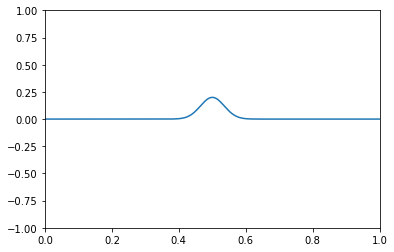

In [26]:
#Setting 
m = 20
M = 440
J = 200
t, _t= np.linspace(0,2,M, retstep = True)
x, _x = np.linspace(0,1,J, retstep = True)
s = 1
lamb = s*_t/_x
F = lambda x: .2*np.exp((-m**2)*(x-1/2)**2)
G = lambda x: 0*x

#making the W function
def W(t, x, _t, _x, J, M, lamb, F, G):
    #setting A
    A = diags([lamb**2, 2*(1-lamb**2), lamb**2], 
              [-1, 0, 1], shape=(J-2, J-2)).toarray()
    #setting U matrix
    U = np.zeros((M,J))
    #modifyihng the matrix
    U[0][1:-1] = F(x[1:-1])
    U[1][1:-1] = (U[0][1:-1] + 
                  _t*G(x[1:-1]) + 
                  (lamb**2)/2*(U[0][:-2]- 2*U[0][1:-1]+U[0][2:]))
    
    for i in range(2,M):
        U[i][1:-1] = A@U[i-1][1:-1]-U[i-2][1:-1]
        
    return U

U = W(t, x, _t, _x, J, M, lamb, F, G)

#Animation plotting
def update(i):
    graph.set_data(x,U[i][:])
    return graph,
fig = plt.figure()
ax = fig.add_subplot(111)
graph, = plt.plot([],[])
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ani = animation.FuncAnimation(fig, update, frames = range(M), interval = 25)

ani.save('Wave_3.mp4')

<video src="Wave_3.mp4" controls>

# Problem 4

Consider the initial boundary value problem

$$
	u_{tt} = u_{xx}, \\
	u(0,t) = u(1,t) = 0, \\
	u(x,0) = \begin{cases} 1/3 & \text{if } 5/11 < x < 6/11,\\
	0 & \text{otherwise}
	\end{cases}\\
	u_t(x,0) = 0.
$$

Numerically approximate the solution $u(x,t)$ for $t \in \left[0, 2\right]$.
Use 200 subintervals in space and 440 in time, and animate your results.
Even though the method is second order and stable for this discretization, since the initial condition is discontinuous there are large dispersive errors.

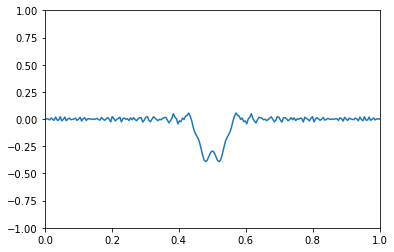

In [27]:
#Setting 
m = 20
M = 440
J = 220
t, _t= np.linspace(0,1,M, retstep = True)
x, _x = np.linspace(0,1,J, retstep = True)
s = 1
lamb = s*_t/_x
F = lambda x: np.piecewise(x, [(x > 5/11)&(x < 6/11), (x >= 6/11),(x <= 5/11)], 
                           [1/3, 0,0])
G = lambda x: 0*x


#making the W function
def W(t, x, _t, _x, J, M, lamb, F, G):
    #setting A
    A = diags([lamb**2, 2*(1-lamb**2), lamb**2], 
              [-1, 0, 1], shape=(J-2, J-2)).toarray()
    #setting U matrix
    U = np.zeros((M,J))
    #modifyihng the matrix
    U[0][1:-1] = F(x[1:-1])
    U[1][1:-1] = (U[0][1:-1] + 
                  _t*G(x[1:-1]) + 
                  (lamb**2)/2*(U[0][:-2]- 2*U[0][1:-1]+U[0][2:]))
    
    for i in range(2,M):
        U[i][1:-1] = A@U[i-1][1:-1]-U[i-2][1:-1]
        
    return U

U = W(t, x, _t, _x, J, M, lamb, F, G)

#Animation plotting
def update(i):
    graph.set_data(x,U[i][:])
    return graph,
fig = plt.figure()
ax = fig.add_subplot(111)
graph, = plt.plot([],[])
ax.set_xlim(0,1)
ax.set_ylim(-1,1)
ani = animation.FuncAnimation(fig, update, frames = range(M), interval = 25)

ani.save('Wave_4.mp4')

<video src= "Wave_4.mp4" controls>

# Problem 5


Numerically solve the initial value problem

$$
	u_t -su_x + uu_x = u_{xx}, \quad x \in (-\infty,\infty),\\
	u(x,0) = v(x),
$$

for $t \in [0,1]$.
Let the perturbation $v(x)$ be given by

$$
v(x) = 3.5(\sin{(3x)} + 1)\frac{1}{\sqrt{2\pi}} \exp{(-x^2/2)}
$$

And let the initial condition be $u(x, 0) = \hat{u}(x) + v(x)$
Approximate the $x$ domain,$(-\infty, \infty)$, numerically by the finite interval $[-20,20]$, and fix $u(-20) = u_-$, $u(20) = u_+$. Let $u_- = 5$, $u_+ = 1$.
Use 150 intervals in space and 350 steps in time.
Animate your results.
You should see the solution converge to a translate of the travelling wave $\hat{u}$.

Hint: This difference scheme is no longer a linear equation.
We have a nonlinear equation in $U^{n+1}$.
We can still solve this function using Newton's method or some other similar solver.
In this case, use `scipy.optimize.fsolve`.

In [28]:
def get_u_p5(u_hat, y, u_at_x, a,b,st,et, M, J,s = 3):
    #getting the default values
    ts,_t  = np.linspace(st,et,M+1, retstep = True)
    xs,_x = np.linspace(a,b, J+1, retstep = True)
    K1 = _t/(4*_x)
    K2 = _t/(2*_x**2)
 
    #setting values U
    U = np.zeros((M+1, J+1))
    U[:,0] = 5
    U[:,-1] = 1
    U[0] = u_at_x(xs)

    #modifyig U
    for i in range(1,M+1):
        u = U[i-1]
        def solve(u1):
            #setting equation
            nom = K1*((s-u1[1:-1])*(u1[2:]-u1[:-2])+(s-u[1:-1])*(u[2:] -u[:-2]))
            den = K2*((u1[:-2]-2*u1[1:-1]+u1[2:])+(u[:-2]-2*u[1:-1]+u[2:]))
            #calculate
            result = nom + den -u1[1:-1]+u[1:-1]
            zero_array = np.hstack([u1[0]-5, result, u1[-1]-1])
            return zero_array
        U[i] = fsolve(solve, u)
    return np.array(U),xs

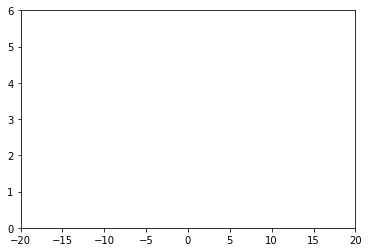

In [29]:
#setting the values
ut = lambda x: x*0
a = 2
s = 3
nu = 1
u_hat = lambda x: s-a*np.tanh((a*x)/(2*nu))
u_at = lambda x: u_hat(x)+v(x)
v = lambda x: 3.5*(np.sin(3*x)+1)*(1/((np.pi*2)**.5))*np.exp(-(x**2)/2)
u_at_st = lambda x: x*0
u_at_et = lambda x: x*0
u_s = -20
u_e = 20
st = 0
et = 1
M, J = 350, 150
x = np.linspace(u_s, u_e, J+1)
#calling the function to get the values
u,x = get_u_p5(u_hat, v, u_at, u_s, u_e, st, et, M, J, s = s)

#plotting the animation
fig = plt.figure()
ax = plt.axes(xlim=(-20,20), ylim=(0,6))
line, = ax.plot([],[], lw=2)
def init():
    line.set_data([],[])
    return line,
def animate(i):
    line.set_data(x,u[i])
    return line,
anim = animation.FuncAnimation(fig, animate, init_func = init, frames=M+1, interval = 25)
plt.show()
anim.save('Wave_5.mp4')

<video src='Wave_5.mp4' controls>